In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix


df = pd.read_csv('predicts_cancelled_no_weather.csv')



In [2]:
columns_to_dummy = ["month", "day_of_week", "airline_code", "common_airline_code","origin","dest","dep_time_blk", "arr_time_blk"]

In [3]:
df = pd.get_dummies(df, columns=columns_to_dummy)

In [10]:
# pd.set_option('display.max_columns', None)
# df

day_of_month  cancelled  scheduled_elapsed_time  distance  \
0                14          0                     183      1208   
1                14          0                     173      1208   
2                10          0                     179      1208   
3                11          0                     177      1208   
4                11          0                     178      1208   
...             ...        ...                     ...       ...   
20221            23          0                     113       590   
20222            23          0                     117       590   
20223            27          0                     116       590   
20224            30          0                     118       590   
20225            30          0                     116       590   

       origin_takeoff_weather Severity  origin_takeoff_weather_Precipitation  \
0                                    2                                  0.00   
1                                    2                                  0.00   
2                                    4                                  0.00   
3                                    1                                  0.03   
4                                    2                                  0.10   
...                                ...                                   ...   
20221                                2                                  1.50   
20222                                1                                  0.49   
20223                                1                                  0.00   
20224                                2                                  0.36   
20225                                2                                  0.11   

       dest_takeoff_weather Severity  dest_takeoff_weather_Precipitation  \
0                                  1                                0.17   
1                                  1                                0.17   
2                                  2                                0.07   
3                                  1                                0.00   
4                                  2                                0.00   
...                              ...                                 ...   
20221                              1                                0.23   
20222                              1                                0.23   
20223                              2                                0.07   
20224                              1                                0.00   
20225                              1                                0.04   

       origin_weather_length_preflight  dest_weather_length_preflight  \
0                                   37                            158   
1                                   22                            323   
2                                  232                              8   
3                                   82                             38   
4                                   22                             23   
...                                ...                            ...   
20221                              115                            133   
20222                              536                             14   
20223                               14                             13   
20224                               45                             15   
20225                               14                             13   

       month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0            0        0        0        1        0        0        0        0   
1            0        0        0        1        0        0        0        0   
2            0        1        0        0        0        0        0        0   
3            0        1        0        0        0        0        0        0   
4            0        1        0  

In [4]:
X = df.drop('cancelled',axis=1)
y = df['cancelled']

seed= 50
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=seed
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_s, y_train)

y_pred = rf.predict(X_test_s)

cm = confusion_matrix(y_test, y_pred)

features = pd.DataFrame({'feature':list(X.columns),'importance':rf.feature_importances_}).sort_values('importance',ascending=False)



top_features = features.head(10)

top_features

feature  importance
0             day_of_month    0.287341
1   scheduled_elapsed_time    0.144064
2                 distance    0.064983
15           day_of_week_1    0.016618
16           day_of_week_2    0.016617
18           day_of_week_4    0.016286
21           day_of_week_7    0.016266
17           day_of_week_3    0.015547
19           day_of_week_5    0.015042
20           day_of_week_6    0.014533

In [7]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# df.isin(['ORD']).any()
# df.dtypes
# X[~X.applymap(np.isreal).all(1)]
# accuracy_score(y_test, y_pred)
features

feature  importance
0              day_of_month    0.287341
1    scheduled_elapsed_time    0.144064
2                  distance    0.064983
15            day_of_week_1    0.016618
16            day_of_week_2    0.016617
18            day_of_week_4    0.016286
21            day_of_week_7    0.016266
17            day_of_week_3    0.015547
19            day_of_week_5    0.015042
20            day_of_week_6    0.014533
166  dep_time_blk_afternoon    0.013405
11                  month_9    0.012302
169  arr_time_blk_afternoon    0.011970
168    dep_time_blk_morning    0.010931
170    arr_time_blk_evening    0.010024
171    arr_time_blk_morning    0.010019
167    dep_time_blk_evening    0.009479
4                   month_2    0.009377
12                 month_10    0.008227
9                   month_7    0.007020
14                 month_12    0.006963
10                  month_8    0.006769
8                   month_6    0.006233
118                dest_DEN    0.005150
144                dest_ORD    0.005119
55               origin_DEN    0.005050
81               origin_ORD    0.004941
13                 month_11    0.004714
56               origin_DFW    0.004704
5                   month_3    0.004638
27   common_airline_code_AA    0.004573
147                dest_PHX    0.004414
63               origin_IAH    0.004333
126                dest_IAH    0.004277
119                dest_DFW    0.004250
84               origin_PHX    0.004183
141                dest_MSY    0.003760
67               origin_LAS    0.003451
78               origin_MSY    0.003390
130                dest_LAS    0.003325
68               origin_LAX    0.003281
131                dest_LAX    0.003186
33   common_airline_code_OO    0.003143
50               origin_CLT    0.003082
113                dest_CLT    0.003031
3                   month_1    0.002874
42               origin_AUS    0.002784
22          airline_code_AA    0.002710
105                dest_AUS    0.002589
41               origin_ATL    0.002549
107                dest_BNA    0.002478
44               origin_BNA    0.002427
104                dest_ATL    0.002367
7                   month_5    0.002358
92               origin_SEA    0.002329
37   common_airline_code_YV    0.002306
24          airline_code_UA    0.002293
6                   month_4    0.002256
90               origin_SAT    0.002089
155                dest_SEA    0.002082
74               origin_MEM    0.002050
35   common_airline_code_UA    0.002042
153                dest_SAT    0.002039
137                dest_MEM    0.001986
38   common_airline_code_YX    0.001907
89               origin_SAN    0.001891
161                dest_STL    0.001881
158                dest_SLC    0.001859
95               origin_SLC    0.001844
72               origin_MCO    0.001811
98               origin_STL    0.001809
69               origin_LGA    0.001768
47               origin_BWI    0.001751
152                dest_SAN    0.001746
99               origin_TPA    0.001744
134                dest_MCI    0.001739
132                dest_LGA    0.001720
135                dest_MCO    0.001709
59               origin_EWR    0.001700
160                dest_SNA    0.001685
97               origin_SNA    0.001685
87               origin_RNO    0.001671
93               origin_SFO    0.001669
110                dest_BWI    0.001655
71               origin_MCI    0.001642
138                dest_MIA    0.001635
162                dest_TPA    0.001590
54               origin_DCA    0.001576
127                dest_IND    0.001553
122                dest_EWR    0.001545
31   common_airline_code_MQ    0.001533
117                dest_DCA    0.001522
150                dest_RNO    0.001519
96               origin_SMF    0.001517
77               origin_MSP    0.001515
75               origin_MIA    0.001502
140                dest_MSP    0.001501
83               origin_PHL    0.001494
64               origin_IND    0.001486
25          airline_

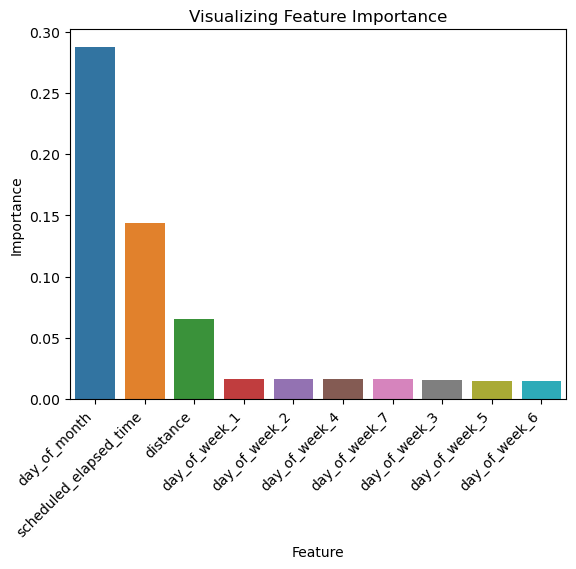

In [5]:
ax = sns.barplot(x = top_features.feature, y = top_features.importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Visualizing Feature Importance')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

In [8]:
df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_pred))
df.index.name = 'Actual label'
df.columns.name = 'Predicted label'
df

Predicted label       0    1
Actual label                
0                267297  461
1                  3196  432

In [9]:
accuracy_score(y_test, y_pred)

0.9865247286153302

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, accuracy_score
gb = XGBClassifier()
gb.fit(X, y)
y_hat = gb.predict(X)
accuracy_score(y,y_hat)


0.9882304041812078

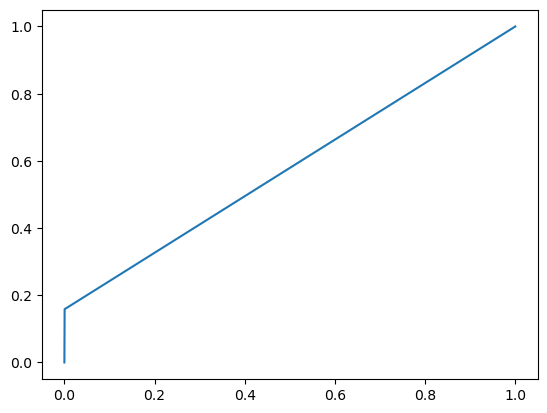

In [13]:
from sklearn.metrics import roc_curve 
curve = roc_curve(y, gb.predict(X))
plt.plot(curve[0], curve[1], label='ROC');


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import auc, accuracy_score
gb = XGBClassifier()
gb.fit(X, y)
y_hat = gb.predict(X)
auc(curve[0],curve[1])

0.5790286620758113